<a href="https://colab.research.google.com/github/asosialuk/Plant-Detection/blob/main/plant_detecion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install opendatasets
!pip install opendatasets

In [2]:
#import libraries
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
import os
from os import listdir
from PIL import Image
import seaborn as sns

In [3]:
#kaggle dataset download
od.download("https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: alicjasosialuk
Your Kaggle Key: ··········


100%|██████████| 2.70G/2.70G [00:29<00:00, 97.3MB/s]


In [ ]:
#just for info{"username":"alicjasosialuk","key":"fa69bfa4724b0a10006ba687db303759"}

In [4]:
#path to datasets
data_dir_train = './new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
data_dir_val = './new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid'
data_dir_test = './new-plant-diseases-dataset/test/test'

In [7]:
#listing the folders
os.listdir(data_dir_train)

['Corn_(maize)___Common_rust_',
 'Tomato___Target_Spot',
 'Tomato___Late_blight',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Apple___Black_rot',
 'Tomato___Septoria_leaf_spot',
 'Apple___Apple_scab',
 'Strawberry___Leaf_scorch',
 'Tomato___Leaf_Mold',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Apple___healthy',
 'Pepper,_bell___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Potato___healthy',
 'Blueberry___healthy',
 'Peach___Bacterial_spot',
 'Soybean___healthy',
 'Apple___Cedar_apple_rust',
 'Cherry_(including_sour)___healthy',
 'Peach___healthy',
 'Corn_(maize)___healthy',
 'Potato___Late_blight',
 'Cherry_(including_sour)___Powdery_mildew',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Raspberry___healthy',
 'Tomato___Early_blight',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Tomato___Bacterial_spot',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Squash___Powdery_mildew',
 'Potato___Early_blight',
 'Grape___Black_ro

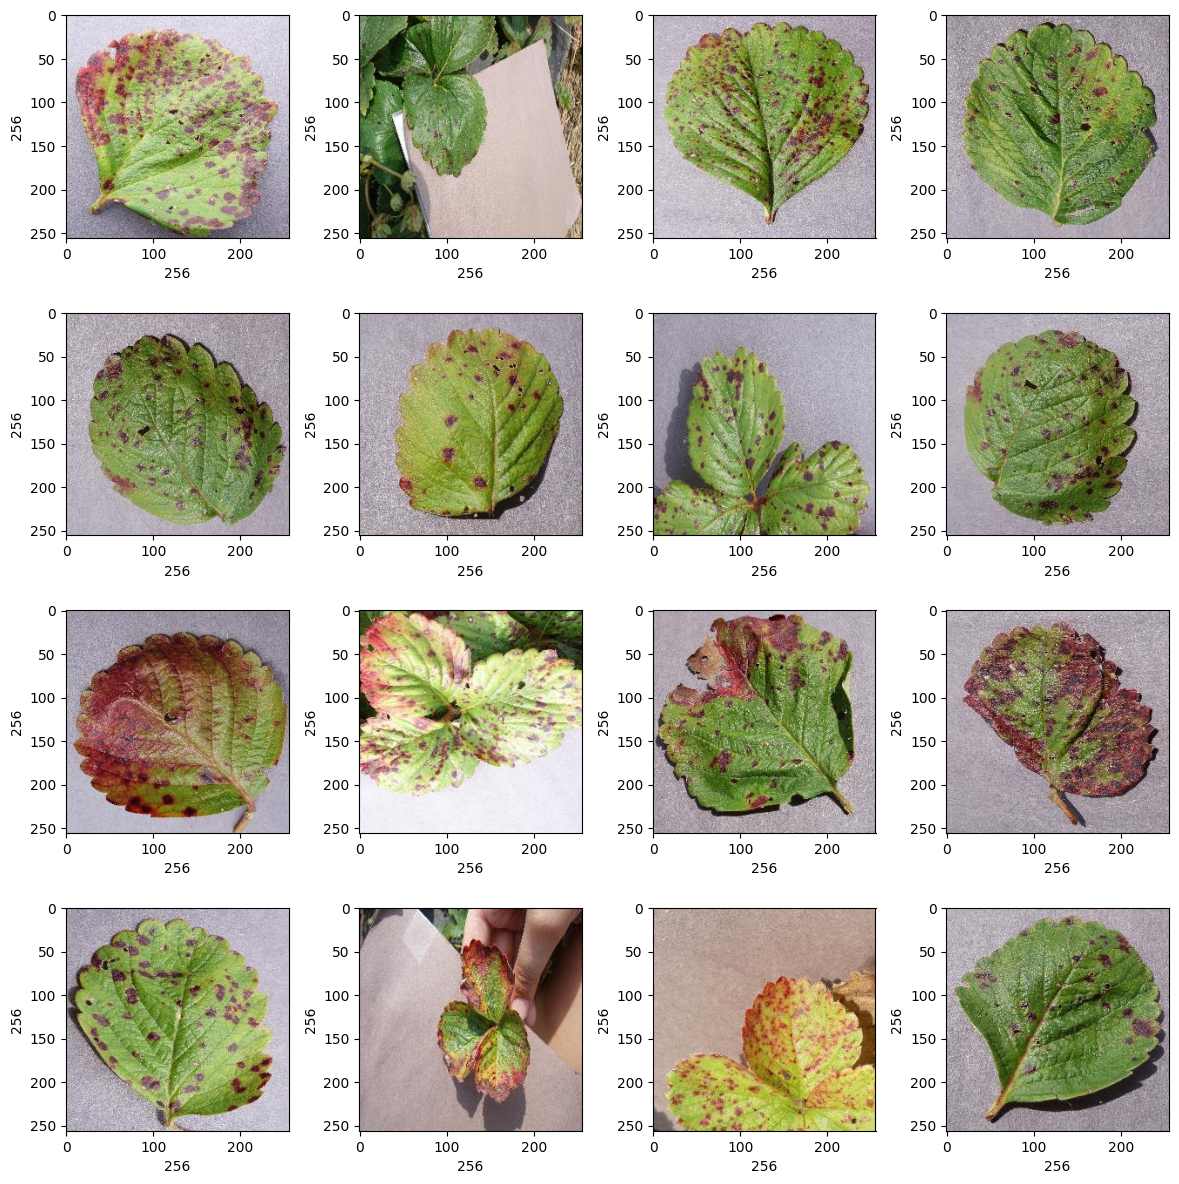

In [8]:
# showing some random photos for the quality check - Strawberry Leaf scorch
plt.figure(figsize=(12,12))
#path = data_dir
for i in range(1,17):
    data_dir = './new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/Strawberry___Leaf_scorch'
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(data_dir +'/'+ random.choice(sorted(os.listdir(data_dir))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 10)#height of image

In [ ]:
#creation of the data frame with the info
import pandas as pd
data = []

for directory in os.listdir(data_dir_train):
    columns = directory.split('___')
    columns.append(directory)

    sub_path = data_dir_train + '/' + directory
    columns.append(len([name for name in os.listdir(path=sub_path)]))

    data.append(columns)

data = pd.DataFrame(data, columns=['Plant', 'Disease', 'Directory', 'Files'])
data.sort_values(by='Plant')

In [12]:
#Total of pictures
data['Files'].sum()

70295

In [ ]:
data['Disease']

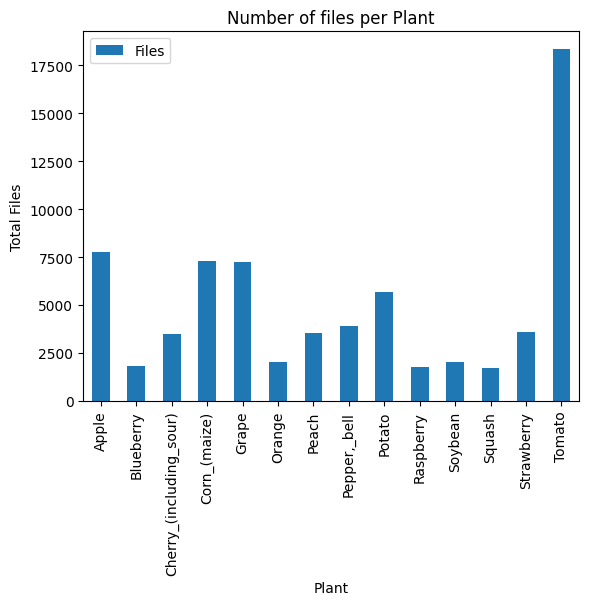

In [15]:
data.groupby('Plant')['Files'].sum().plot(kind='bar')
plt.legend()
plt.xlabel('Plant')
plt.ylabel('Total Files')
plt.title('Number of files per Plant')
plt.show()


<ipython-input-46-8793a2ec4f9a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = data.groupby(['Plant', 'Disease']).sum().reset_index()


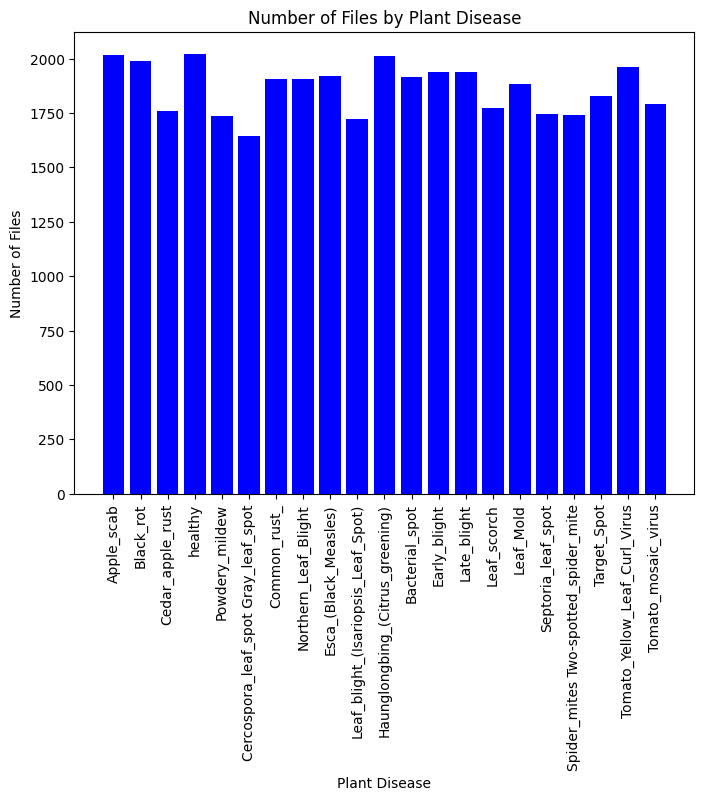

In [ ]:
grouped_data = data.groupby(['Plant', 'Disease']).sum().reset_index()
plt.figure(figsize=(8, 6))
plt.bar(grouped_data['Disease'], grouped_data['Files'], color='blue')
plt.title('Number of Files by Plant Disease')
plt.xlabel('Plant Disease')
plt.ylabel('Number of Files')
plt.xticks(rotation=90)
plt.show()

ValueError: num must be an integer with 1 <= num <= 16, not 17

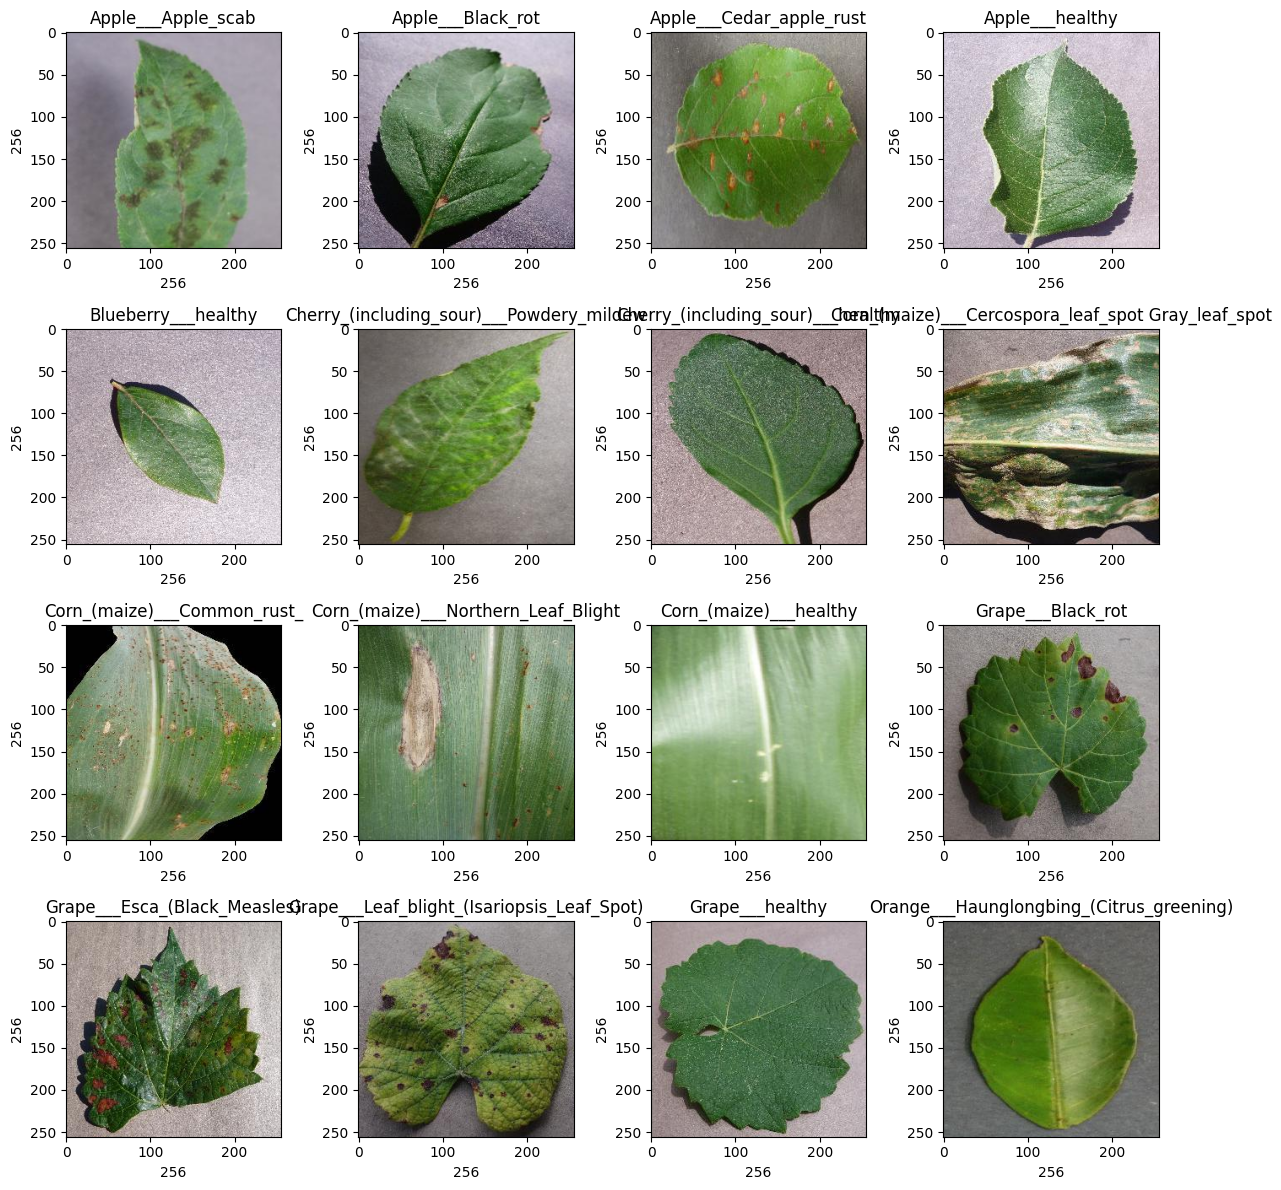

In [9]:
#showing random pictures from the folder _train
plt.figure(figsize=(12,12))

#data_dir_train = './new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'

folders = sorted(os.listdir(data_dir_train))

for i, folder in enumerate(folders):
    plt.subplot(4, 4,i+1)
    plt.tight_layout()
    image_file = os.path.join(data_dir_train, folder, os.listdir(os.path.join(data_dir_train, folder))[0])
    image = imread(image_file)
    plt.imshow(image)
    plt.xlabel(image.shape[1], fontsize=10)  # width of image
    plt.ylabel(image.shape[0], fontsize=10)  # height of image
    plt.title(folder)

plt.show()

In [72]:
import cv2
import numpy as np
import os

data_dir_train = './new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'
all_labels = {'Apple___Apple_scab':0, 'Apple___Black_rot':1, 'Apple___Cedar_apple_rust':2, 'Apple___healthy':3, 'Blueberry___healthy':4, 'Cherry_(including_sour)___Powdery_mildew':5, 'Cherry_(including_sour)___healthy':6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot':7, 'Corn_(maize)___Common_rust_':8, 'Corn_(maize)___Northern_Leaf_Blight':9, 'Corn_(maize)___healthy':10, 'Grape___Black_rot':11, 'Grape___Esca_(Black_Measles)':12, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)':13, 'Grape___healthy':14, 'Orange___Haunglongbing_(Citrus_greening)':15, 'Peach___Bacterial_spot':16, 'Peach___healthy':17, 'Pepper,_bell___Bacterial_spot':18, 'Pepper,_bell___healthy':19, 'Potato___Early_blight':20, 'Potato___Late_blight':21, 'Potato___healthy':22, 'Raspberry___healthy':23, 'Soybean___healthy':24, 'Squash___Powdery_mildew':25, 'Strawberry___Leaf_scorch':26, 'Strawberry___healthy':27, 'Tomato___Bacterial_spot':28, 'Tomato___Early_blight':29, 'Tomato___Late_blight':30, 'Tomato___Leaf_Mold':31, 'Tomato___Septoria_leaf_spot':32, 'Tomato___Spider_mites Two-spotted_spider_mite':33, 'Tomato___Target_Spot':34, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus':35, 'Tomato___Tomato_mosaic_virus':36, 'Tomato___healthy':37}

# Create empty lists to store images and labels
images = []
labels = []

# Loop through all folders in the data directory
for folder in os.listdir(data_dir_train):
    # Loop through all images in the folder
    for file in os.listdir(os.path.join(data_dir_train, folder)):
        # Load the image
        img = cv2.imread(os.path.join(data_dir_train, folder, file))
        # Resize the image to 256x256
        img = cv2.resize(img, (256, 256))
        # Convert the image to grayscale
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Convert the image to an array
        img = np.array(img)
        # Append the image to the list of images
        images.append(img)
        # Append the label to the list of labels
        labels.append(all_labels[folder])

# Convert the lists of images and labels to arrays
images = np.array(images)
labels = np.array(labels)

# Print the shape of the arrays
print('Images shape:', images.shape)
print('Labels shape:', labels.shape)


Images shape: (70295, 256, 256)
Labels shape: (70295,)
